In [2]:
import pandas as pd
import torch
import pickle

from bs4 import BeautifulSoup

import seaborn as sns
import torch.nn as nn
import numpy as np

In [3]:
df1 = pd.read_csv("filtered_resume.csv")
df2 = pd.read_csv("resumes_from_pdf_2.csv")

In [4]:
df1 = df1[["keywords_bert","Category"]]
df2 = df2[["keywords_bert","label"]]

In [5]:
df1.rename(columns = {'Category':'label'}, inplace = True)

In [6]:
df = pd.concat([df1, df2])

In [7]:
len(df)

4968

In [8]:
df['label'].value_counts()

INFORMATION-TECHNOLOGY    240
BUSINESS-DEVELOPMENT      240
FINANCE                   236
ADVOCATE                  236
ACCOUNTANT                236
ENGINEERING               236
CHEF                      236
AVIATION                  234
FITNESS                   234
SALES                     232
BANKING                   230
HEALTHCARE                230
CONSULTANT                230
CONSTRUCTION              224
PUBLIC-RELATIONS          222
HR                        220
DESIGNER                  214
ARTS                      206
TEACHER                   204
APPAREL                   194
DIGITAL-MEDIA             192
AGRICULTURE               126
AUTOMOBILE                 72
BPO                        44
Name: label, dtype: int64

In [9]:
from ast import literal_eval
df.keywords_bert = df.keywords_bert.apply(literal_eval)

In [10]:
def get_first_ele(x):
    res = []
    for i in x:
        res.append(i[0])
    return ','.join(res)

df['keywords_bert'] = df.keywords_bert.apply(lambda x: get_first_ele(x))

In [11]:
df['keywords_bert']

0       hr administrator,missouri dot supervisor train...
1       us hr operations,hr managers,us hr operations ...
2       hris development,human resource program,human ...
3       customer service expertise,hr specialist,custo...
4       hr skills,human resource management,hr service...
                              ...                        
2479    automobile liability claims representative,gen...
2480    automobile transporter,car transporter,car hau...
2481    programming,statistics softwares,mechanical sk...
2482    customer relations specialist,customer service...
2483    senior fraud claims specialist degree,certifie...
Name: keywords_bert, Length: 4968, dtype: object

In [12]:
df.head()

,keywords_bert,label
0,"hr administrator,missouri dot supervisor train...",HR
1,"us hr operations,hr managers,us hr operations ...",HR
2,"hris development,human resource program,human ...",HR
3,"customer service expertise,hr specialist,custo...",HR
4,"hr skills,human resource management,hr service...",HR


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
from sklearn.svm import SVC ,SVR
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


## Logistic Regression

In [14]:
# In the first step we will split the data in training and remaining dataset
x_train, X_rem, y_train, y_rem = train_test_split(df['keywords_bert'],df['label'], train_size=0.7,random_state=42)

# train, valid, test -> 70, 10, 20
x_valid, x_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.666,random_state=42)

print(x_train.shape), print(y_train.shape)
print(x_valid.shape), print(y_valid.shape)
print(x_test.shape), print(y_test.shape)
print(type(x_train))


# Create a TfidfVectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_valid = vectorizer.transform(x_valid)

(3477,)
(3477,)
(497,)
(497,)
(994,)
(994,)
<class 'pandas.core.series.Series'>


In [12]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)


# Evaluate the model on the test set
score = model.score(x_valid, y_valid)
print('Accuracy:', score)

(3477,)
(3477,)
(497,)
(497,)
(994,)
(994,)
<class 'pandas.core.series.Series'>
Accuracy: 0.7545271629778671


## Support Vector Machine

In [13]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly', 'rbf', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)


# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.151 total time=   1.7s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.158 total time=   1.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.147 total time=   1.7s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.163 total time=   1.7s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.170 total time=   2.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.356 total time=   2.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.305 total time=   2.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.294 total time=   2.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.342 total time=   2.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.351 total time=   2.7s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.606 total time=   2.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.517 total time=   1.7s
[CV 3/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.541 total time=   1.7s
[CV 4/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.586 total time=   1.7s
[CV 5/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.573 total time=   1.9s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.049 total time=   2.1s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.049 total time=   2.8s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.050 total time=   2.5s
[CV 4/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.050 total time=   3.5s
[CV 5/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.050 total time=   2.7s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.187 total time=   3.5s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.180 total time=   3.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.186 total time=   2.9s
[CV 4/5] END .......C=1, gam

[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.204 total time=   2.9s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.216 total time=   2.5s
[CV 1/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.049 total time=   2.0s
[CV 2/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.050 total time=   2.1s
[CV 3/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.050 total time=   2.0s
[CV 4/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.050 total time=   2.0s
[CV 5/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.050 total time=   2.0s
[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.049 total time=   1.9s
[CV 2/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.049 total time=   2.1s
[CV 3/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.050 total time=   2.3s
[CV 4/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.050 total time=   2.2s
[CV 5/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.050 total time=   2.2s
[CV 1/5] END ....C=10, gamma

[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.774 total time=   3.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.733 total time=   3.6s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.725 total time=   3.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.745 total time=   3.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.721 total time=   3.2s
[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.688 total time=   1.7s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.642 total time=   1.6s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.642 total time=   1.7s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.672 total time=   1.7s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.650 total time=   1.7s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.645 total time=   3.1s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.631 total time=   3.0s
[CV 3/5] END ....C=1000, gam

In [16]:
score_svm = grid.score(x_valid, y_valid)
print(score_svm)

0.8350100603621731


In [24]:
x_test = vectorizer.transform(x_test)
grid_predictions = grid.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.92      0.90      0.91        52
              ADVOCATE       0.75      0.75      0.75        52
           AGRICULTURE       0.80      0.70      0.74        23
               APPAREL       0.65      0.76      0.70        42
                  ARTS       0.61      0.70      0.65        43
            AUTOMOBILE       1.00      0.57      0.73        14
              AVIATION       0.61      0.76      0.68        46
               BANKING       0.76      0.83      0.79        41
                   BPO       1.00      1.00      1.00         8
  BUSINESS-DEVELOPMENT       0.83      0.90      0.86        39
                  CHEF       0.95      0.95      0.95        42
          CONSTRUCTION       0.82      0.86      0.84        37
            CONSULTANT       0.72      0.72      0.72        46
              DESIGNER       0.97      0.88      0.93        43
         DIGITAL-MEDIA       0.83      

In [26]:
pickle.dump(grid, open("resume-classifier-svm.pkl", "wb"))

In [27]:
model_svm = pickle.load(open("resume-classifier-svm.pkl", "rb"))
model_svm.predict(x_test)

array(['APPAREL', 'DIGITAL-MEDIA', 'AVIATION', 'ADVOCATE', 'ARTS',
       'ENGINEERING', 'ARTS', 'APPAREL', 'BANKING', 'AVIATION', 'FITNESS',
       'FITNESS', 'DESIGNER', 'TEACHER', 'PUBLIC-RELATIONS', 'ACCOUNTANT',
       'ENGINEERING', 'BUSINESS-DEVELOPMENT', 'SALES',
       'INFORMATION-TECHNOLOGY', 'FITNESS', 'FINANCE', 'ENGINEERING',
       'ARTS', 'HEALTHCARE', 'AGRICULTURE', 'TEACHER', 'CONSULTANT',
       'AGRICULTURE', 'APPAREL', 'HEALTHCARE', 'AVIATION', 'ENGINEERING',
       'FINANCE', 'CONSTRUCTION', 'INFORMATION-TECHNOLOGY', 'BANKING',
       'APPAREL', 'HR', 'CHEF', 'BUSINESS-DEVELOPMENT', 'CONSTRUCTION',
       'AVIATION', 'FINANCE', 'ARTS', 'ARTS', 'HEALTHCARE', 'AVIATION',
       'APPAREL', 'CONSULTANT', 'INFORMATION-TECHNOLOGY', 'FITNESS',
       'INFORMATION-TECHNOLOGY', 'APPAREL', 'ENGINEERING', 'HR',
       'TEACHER', 'AVIATION', 'FINANCE', 'PUBLIC-RELATIONS', 'HEALTHCARE',
       'DIGITAL-MEDIA', 'FINANCE', 'ENGINEERING', 'ACCOUNTANT', 'BANKING',
       'ACCOUNTA

In [30]:
type(x_train)

scipy.sparse._csr.csr_matrix

## Random Forest Classifier

In [28]:
# defining parameter range
param_grid_rf = {'n_estimators': [160,180,200], 
              'criterion': ["gini", "entropy"]
            } 
  
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf)
  
# fitting the model for grid search
grid_rf.fit(x_train, y_train)


# print best parameter after tuning
print(grid_rf.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_rf.best_estimator_)

score_rf = grid_rf.score(x_valid, y_valid)
print(score_rf)


pickle.dump(grid_rf, open("resume-classifier-rf.pkl", "wb"))

model_rf = pickle.load(open("resume-classifier-rf.pkl", "rb"))
model_rf.predict(x_test)

{'criterion': 'entropy', 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', n_estimators=200)
0.7987927565392354


array(['APPAREL', 'DIGITAL-MEDIA', 'DESIGNER', 'ADVOCATE', 'ADVOCATE',
       'ENGINEERING', 'ARTS', 'APPAREL', 'FINANCE', 'AVIATION', 'FITNESS',
       'SALES', 'DESIGNER', 'TEACHER', 'PUBLIC-RELATIONS', 'ACCOUNTANT',
       'ENGINEERING', 'BUSINESS-DEVELOPMENT', 'SALES',
       'INFORMATION-TECHNOLOGY', 'FITNESS', 'FINANCE', 'ENGINEERING',
       'HEALTHCARE', 'HEALTHCARE', 'AGRICULTURE', 'TEACHER', 'CONSULTANT',
       'TEACHER', 'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'ENGINEERING',
       'ENGINEERING', 'FINANCE', 'CONSTRUCTION', 'INFORMATION-TECHNOLOGY',
       'BANKING', 'BUSINESS-DEVELOPMENT', 'HR', 'CHEF',
       'BUSINESS-DEVELOPMENT', 'CONSTRUCTION', 'AVIATION', 'FINANCE',
       'ARTS', 'BUSINESS-DEVELOPMENT', 'HR', 'AVIATION', 'DESIGNER',
       'CONSULTANT', 'INFORMATION-TECHNOLOGY', 'FITNESS',
       'INFORMATION-TECHNOLOGY', 'APPAREL', 'ENGINEERING', 'HR',
       'TEACHER', 'ADVOCATE', 'FINANCE', 'PUBLIC-RELATIONS',
       'INFORMATION-TECHNOLOGY', 'BUSINESS-DEVELOPMENT',

In [15]:
model_rf = pickle.load(open("resume-classifier-rf.pkl", "rb"))
score_rf = model_rf.score(x_valid, y_valid)
print(score_rf)

0.7987927565392354


## Multinomial Naive Bayes

In [14]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* 24, ]
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(x_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(multinomial_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(multinomial_nb_grid.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.681
Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': True}



In [20]:
grid_predictions_mnb = multinomial_nb_grid.predict(x_valid)
  
# print classification report
print(classification_report(y_valid, grid_predictions_mnb))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.93      0.90      0.91        29
              ADVOCATE       0.62      0.67      0.64        24
           AGRICULTURE       0.60      0.43      0.50         7
               APPAREL       0.86      0.71      0.77        17
                  ARTS       0.74      0.64      0.68        22
            AUTOMOBILE       0.50      0.33      0.40         6
              AVIATION       0.75      0.68      0.71        22
               BANKING       0.78      0.86      0.82        21
                   BPO       0.00      0.00      0.00         1
  BUSINESS-DEVELOPMENT       0.71      0.71      0.71        35
                  CHEF       0.92      0.96      0.94        24
          CONSTRUCTION       0.69      0.79      0.73        14
            CONSULTANT       0.67      0.70      0.68        23
              DESIGNER       1.00      0.84      0.91        25
         DIGITAL-MEDIA       0.73      

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.neural_network import MLPClassifier
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1500,2000], 'alpha': 10.0 ** -np.arange(1, 5), 'hidden_layer_sizes':np.arange(10, 13), 'random_state':[0,5,9]}
clf_mlp = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf_mlp.fit(x_train, y_train)
print(clf_mlp.score(x_train, y_train))
print(clf_mlp.best_params_)

1.0
{'alpha': 0.1, 'hidden_layer_sizes': 12, 'max_iter': 1500, 'random_state': 5, 'solver': 'lbfgs'}


In [27]:
print('Best Accuracy Through Grid Search : {:.3f}'.format(clf_mlp.best_score_))


Best Accuracy Through Grid Search : 0.692


In [26]:
pickle.dump(clf_mlp, open("resume-classifier-mlp.pkl", "wb"))

clf_mlp = pickle.load(open("resume-classifier-mlp.pkl", "rb"))
clf_mlp.predict(x_test)

array(['APPAREL', 'APPAREL', 'HEALTHCARE', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'ENGINEERING', 'ARTS', 'APPAREL',
       'ADVOCATE', 'APPAREL', 'FITNESS', 'SALES', 'HEALTHCARE', 'TEACHER',
       'PUBLIC-RELATIONS', 'ACCOUNTANT', 'ENGINEERING', 'SALES', 'SALES',
       'INFORMATION-TECHNOLOGY', 'FITNESS', 'FINANCE', 'ENGINEERING',
       'ADVOCATE', 'HEALTHCARE', 'TEACHER', 'TEACHER', 'CONSULTANT',
       'AGRICULTURE', 'APPAREL', 'HEALTHCARE', 'AVIATION', 'ENGINEERING',
       'FINANCE', 'ACCOUNTANT', 'INFORMATION-TECHNOLOGY', 'BANKING',
       'HEALTHCARE', 'HR', 'CHEF', 'BUSINESS-DEVELOPMENT', 'CONSTRUCTION',
       'AVIATION', 'FINANCE', 'ADVOCATE', 'ARTS', 'ADVOCATE', 'AVIATION',
       'DESIGNER', 'CONSULTANT', 'INFORMATION-TECHNOLOGY', 'FITNESS',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'ENGINEERING', 'HR',
       'TEACHER', 'ADVOCATE', 'FINANCE', 'PUBLIC-RELATIONS',
       'INFORMATION-TECHNOLOGY', 'DIGITAL-MEDIA', 'FINANCE',
       'ENGINEERING', 'AVIATION', 

In [28]:
score_mlp =clf_mlp.score(x_valid, y_valid)
print(score_mlp)

0.7585513078470825


# Deep Learning Models

In [33]:
# !pip install torch
# !pip install transformers

In [34]:
import transformers
from transformers import AutoModel, BertTokenizerFast

In [35]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [90]:
# In the first step we will split the data in training and remaining dataset
train_text, temp_text, train_labels, temp_labels= train_test_split(df['keywords_bert'],df['label'], train_size=0.7,random_state=42)

# train, valid, test -> 70, 10, 20
val_text, test_text, val_labels, test_labels = train_test_split(X_rem,y_rem, test_size=0.666,random_state=42)

In [91]:
train_labels_set = list(set(train_labels))
label_to_idx = {v : train_labels_set.index(v) for v in train_labels_set}
idx_to_label = {train_labels_set.index(v) : v  for v in train_labels_set}

In [92]:
idx_to_label

{0: 'BUSINESS-DEVELOPMENT',
 1: 'ARTS',
 2: 'SALES',
 3: 'ACCOUNTANT',
 4: 'AGRICULTURE',
 5: 'HEALTHCARE',
 6: 'DIGITAL-MEDIA',
 7: 'CONSULTANT',
 8: 'ADVOCATE',
 9: 'BPO',
 10: 'APPAREL',
 11: 'PUBLIC-RELATIONS',
 12: 'AUTOMOBILE',
 13: 'CONSTRUCTION',
 14: 'INFORMATION-TECHNOLOGY',
 15: 'AVIATION',
 16: 'TEACHER',
 17: 'FITNESS',
 18: 'ENGINEERING',
 19: 'BANKING',
 20: 'HR',
 21: 'CHEF',
 22: 'DESIGNER',
 23: 'FINANCE'}

In [93]:
def text_labels_to_num(train_labels):
    # a temporary list to store the string labels
    temp_list = train_labels.tolist()
    # list to store integer labels 
    int_labels = []

    for i in range(len(temp_list)):
        int_labels.append(label_to_idx[temp_list[i]])
    return int_labels

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/anaconda3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [94]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        self.bert = bert 
      # dropout layer
        self.dropout = nn.Dropout(0.1)
      # relu activation function
        self.relu =  nn.ReLU()
      # dense layer 1
        self.fc1 = nn.Linear(768,512)
      # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,24)
      #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)
        
        
    def forward(self, sent_id, mask):
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        
        # output layer
        x = self.fc2(x)
        #apply softmax activation
        x = self.softmax(x)
        
        return x  


In [96]:
max_seq_len = 25
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])


int_labels_train = text_labels_to_num(train_labels)
train_y = torch.tensor(int_labels_train)

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])

int_labels_val = text_labels_to_num(val_labels)
val_y = torch.tensor(int_labels_val)

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
int_labels_test = text_labels_to_num(test_labels)
test_y = torch.tensor(int_labels_test)


from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)


# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False


/opt/anaconda3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [107]:
from sklearn.utils.class_weight import compute_class_weight
model = BERT_Arch(bert)
# optimizer from hugging face transformers
from transformers import AdamW
# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)
from sklearn.utils.class_weight import compute_class_weight
#compute the class weights
class_wts = compute_class_weight(class_weight = "balanced", classes= np.unique(train_labels), y= train_labels)
print(class_wts)
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
#weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

# function to train the model
def train():
    model.train()
    total_loss, total_accuracy = 0, 0
  # empty list to save model predictions
    total_preds=[]
  # iterate over batches
    for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
              print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
        #batch = [r.to(device) for r in batch]
 
        sent_id, mask, labels = batch

    # clear previously calculated gradients 
        model.zero_grad()        

    # get model predictions for the current batch
        preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

    # add on to the total loss
        total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
        loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
        optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

    # append the model predictions
        total_preds.append(preds)

  # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
    return avg_loss, total_preds

# function for evaluating the model
def evaluate():
    print("\nEvaluating...")
  
  # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
    total_preds = []

  # iterate over batches
    for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:     
      # Calculate elapsed time in minutes.
          elapsed = format_time(time.time() - t0)         
      # Report progress.
          print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    # batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

          # model predictions
            preds = model(sent_id, mask)

          # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

  # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

[0.93467742 0.90546875 1.50911458 1.07314815 1.02748227 2.78605769
 0.87274096 0.86235119 4.13928571 0.87274096 0.85220588 0.83742775
 0.89984472 0.99229452 1.02024648 0.91116352 0.94074675 0.87274096
 0.88880368 0.96583333 0.91693038 0.94689542 0.93467742 0.94689542]


/opt/anaconda3/lib/python3.8/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [108]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights_2.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10
  Batch    50  of    109.
  Batch   100  of    109.

Evaluating...

Training Loss: 3.053
Validation Loss: 2.998

 Epoch 2 / 10
  Batch    50  of    109.
  Batch   100  of    109.

Evaluating...

Training Loss: 3.013
Validation Loss: 2.993

 Epoch 3 / 10
  Batch    50  of    109.
  Batch   100  of    109.

Evaluating...

Training Loss: 2.981
Validation Loss: 2.944

 Epoch 4 / 10
  Batch    50  of    109.
  Batch   100  of    109.

Evaluating...

Training Loss: 2.949
Validation Loss: 2.918

 Epoch 5 / 10
  Batch    50  of    109.
  Batch   100  of    109.

Evaluating...

Training Loss: 2.901
Validation Loss: 2.845

 Epoch 6 / 10
  Batch    50  of    109.
  Batch   100  of    109.

Evaluating...

Training Loss: 2.857
Validation Loss: 2.765

 Epoch 7 / 10
  Batch    50  of    109.
  Batch   100  of    109.

Evaluating...

Training Loss: 2.809
Validation Loss: 2.740

 Epoch 8 / 10
  Batch    50  of    109.
  Batch   100  of    109.

Evaluating...

Training Loss: 2.755
Validat

In [99]:
#load weights of best model
path = 'saved_weights_2.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

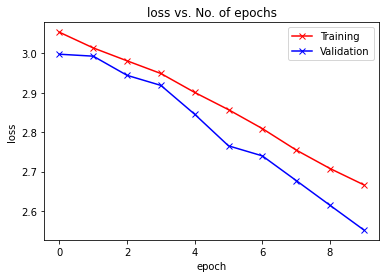

In [109]:
import matplotlib.pyplot as plt

def plot_losses(train_losses,val_losses):
    plt.plot(train_losses, '-rx')
    plt.plot(val_losses, '-bx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('loss vs. No. of epochs')
    
plot_losses(train_losses,valid_losses)


In [ ]:
model = BERT_Arch()
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

In [103]:
preds = torch.tensor([])
true_labels = torch.tensor([])
for step,batch in enumerate(loader):
    sent_id, mask, labels = batch
    with torch.no_grad():
        outputs = model(sent_id, mask)
            

In [104]:
# wrap tensors
test_data = TensorDataset(test_seq, test_mask, test_y)
# sampler for sampling the data during training
test_sampler = SequentialSampler(test_data)
# dataLoader for validation set
test_dataloader = DataLoader(test_data, sampler = test_sampler, batch_size=batch_size)

In [130]:
preds = torch.tensor([])
true_labels = torch.tensor([])
for step,batch in enumerate(test_dataloader):
    sent_id, mask, labels = batch
    # deactivate autograd
    with torch.no_grad():
        # model predictions
        outputs = model(sent_id, mask) 
        _, predicted = torch.max(outputs, 1)
        true_labels = torch.cat((true_labels,labels),dim = 0)
        preds = torch.cat((preds,predicted),dim = 0)

In [131]:
count = 0
for i in range(len(true_labels)):
    if preds[i] == true_labels[i]:
        count = count+1
acc_test = count/ len(true_labels)
print(f'Accuracy of test data is {acc_test}\n')

Accuracy of test data is 0.16297786720321933

